In [1]:
!pip install \
  numpy==1.26.4 \
  scipy==1.13.0 \
  scikit-learn==1.3.2 \
  albumentations==1.4.3 \
  transformers==4.44.2 \
  efficientnet_pytorch==0.7.1 \
  dicomsdl==0.109.2 \
  wandb==0.16.6 \
  --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 208.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 246.9 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 277.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 326.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 40.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00 0:00:01mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 343.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 281.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 231.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━

2025-08-13 11:24:28.511831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755084268.736857      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755084268.801848      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Notebook Color Scheme: 


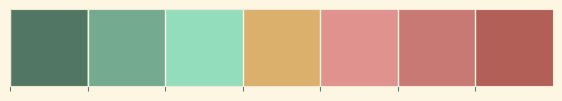

In [2]:
# 1. Handle datasets
import io
import os
import copy
import gc
import cv2
import time
import math
import random
import pydicom
import dicomsdl
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import tifffile as tiff
import imageio.v3 as iio
import SimpleITK as sitk
from pathlib import Path
from tqdm.auto import tqdm
import multiprocessing as mp
from collections import Counter
from joblib import Parallel, delayed
from pydicom.pixel_data_handlers.util import apply_voi_lut

# 2. Visualize datasets
import datetime as dtime
from datetime import datetime
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.figure_factory as pff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from IPython.display import display_html

# 3. Preprocess datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
## import iterative impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
## fastai
# from fastai.data.all import *
# from fastai.vision.all import *

# 4. machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, GroupKFold
## for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from xgboost import XGBClassifier

# 5. Deep Learning
## Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2
from transformers import ViTModel, ViTFeatureExtractor, ViTForImageClassification

## Torch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import FloatTensor, LongTensor
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from efficientnet_pytorch import EfficientNet
from torchvision.models import resnet34, resnet50, ResNet50_Weights
from torchvision import datasets, transforms

# 6. metrics
import optuna
from sklearn.metrics import f1_score, r2_score, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# 7. ignore warnings   
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 8. For displaying and wandb
import wandb
# wandb.login()
plt.style.use("Solarize_Light2")
plt.rcParams.update({'font.size': 16})

# 0. Customization
parent_dir = "/kaggle/input/rsna-breast-cancer-detection"
roi_dir ='/kaggle/input/roi-extract'
pre_train ='/kaggle/input/pre-train'
WANDB_PROJ_NAME = "RSNA_Breast_Cancer_Detection"
CONFIG = {
    'competition': 'RSNA_Breast_Cancer',
    '_wandb_kernel': 'aot'
}

my_colors = ['#517664', '#73AA90', '#94DDBC', '#DAB06C',
             '#DF928E', '#C97973', '#B25F57']
CMAP1 = ListedColormap(my_colors)
print("Notebook Color Scheme: ")
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("wandb")

! wandb login $secret_value_0

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [5]:
# === Here lies some general functionalities ===
# === Seeds and Visualization ===
def set_seed(seed = 1234):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    # On CuDNN we need 2 further options
    torch.backends.cudnn.deterministic = True
    os.environ['PYTHONHASHSEED'] = str(seed)

def show_values_on_bars(axs, h_v = 'v', space = 0.4):
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha='center')
        elif h_v == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_x() + p.get_height()
                
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha='left')
    
    if isinstance(axs, np.ndarray):
        for i, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


In [6]:
def save_dataset_artifact(run_name, artifact_name, path, 
                          projectName = None, config = None, data_type = "dataset"):
    run = wandb.init(project=projectName,
                     name = run_name,
                     config= config)

    artifact = wandb.Artifact(name = artifact_name,
                              type = data_type)
    artifact.add_file(path)
    
    wandb.log_artifact(artifact)
    wandb.finish()
    print("Artifact has been save successfully!")

def create_wandb_plot(x_data = None, y_data = None, x_name = None, y_name = None,
                      title = None, log = None, plot = "line"):
    data = [
        [label, val] for (label, val) in zip(x_data, y_data)
    ]
    table = wandb.Table(data = data, columns = [x_name, y_name])
    
    if plot == "line":
        wandb.log({ log: wandb.plot.line(table, x_name, y_name, title=title) })
    elif plot == "bar":
        wandb.log({ log: wandb.plot.bar(table, x_name, y_name, title=title) })
    elif plot == "scatter":
        wandb.log({ log: wandb.plot.scatter(table, x_name, y_name, title=title) })

def create_wandb_hist(x_data = None, x_name = None, title = None, log = None):
    data = [[x] for x in x_data]
    table = wandb.Table(data = data, columns=[x_name])
    wandb.log({ log: wandb.plot.histogram(table, x_name, title=title) })
    

def show_stacked_images(image_tensor_batch, target_labels=None):
    
    num_images = image_tensor_batch.size(0)
    sqrt_n = int(math.sqrt(num_images))
    ncols = sqrt_n
    nrows = math.ceil(num_images / ncols)
    fig, axis = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(12 * ncols, 8 * nrows)
    )
    axis = axis.flatten()
    
    for i in range(num_images):
        image_tensor = image_tensor_batch[i]
        image = image_tensor.cpu().numpy().transpose((1, 2, 0))     # Transpose to HWC
        
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
    
        image = std * image + mean                                  # Unnormalize
        image = np.clip(image, 0, 1)
        
         # Convert RGB to grayscale
        image_gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        image_gray = image_gray / 255.0
        
        axis[i].imshow(image_gray, cmap="bone")
        axis[i].axis('off')
        if target_labels is not None:
            axis[i].set_title(f"Target: {target_labels[i].item()}")
    
    plt.tight_layout()
    plt.axis('off')
    plt.show()

In [7]:
train = pd.read_csv(os.path.join(parent_dir, "train.csv"))
test = pd.read_csv(os.path.join(parent_dir, "test.csv"))

train_image_path = os.path.join(roi_dir, "train_image_ROI_processed_jp2000_512")
# train_image_path = os.path.join(parent_dir, "train_image_processed_cv2_512")

all_paths = []
for k in tqdm(range(len(train))):
    row = train.iloc[k, :]
    all_paths.append(
        os.path.join(
            train_image_path, str(row.patient_id), f"{str(row.image_id)}.jp2"
        ) 
    )
    
train['path'] = all_paths

train = train[
    ['patient_id', 'image_id', 'laterality', 'view', 'age', 'implant',
     "cancer", "path"]
]

le_laterality = LabelEncoder()
le_view = LabelEncoder()

train['laterality'] = le_laterality.fit_transform(train['laterality'])
train['view']       = le_view.fit_transform(train['view'])

train['age'] = train['age'].fillna(58)

  0%|          | 0/54706 [00:00<?, ?it/s]

In [8]:
# Seed
set_seed()
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now: ', DEVICE)

# Read in Data
train_df = pd.read_csv(os.path.join(pre_train, "train_preprocessed.csv"))
# ====== GLOBAL PARAMS =======
csv_columns = ["laterality", "view", "age", "implant"]
no_columns = len(csv_columns)
output_size = 1

Device available now:  cuda


In [9]:
def transforms(isTrain=False, isMinority=False):
    aug_list = []
    SIZE = 224
    
    # === Spatial: Isotropic Scaling ===
    # For handling different size images
    aug_list += [
        A.LongestMaxSize(max_size=SIZE, p=1),
        A.PadIfNeeded(min_height=SIZE, min_width=SIZE, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),  # Padding to make the image size consistent
    ]
    
    if isTrain:
        if isMinority:          # Stronger augmentations for the minority class
            
            aug_list += [
                
                A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.7),
                A.ISONoise(color_shift=(0.01, 0.03), intensity=(0.05, 0.15), p=0.2),
                A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),
                A.RandomBrightnessContrast(p=0.2),
                A.HorizontalFlip(p=0.3),
                A.VerticalFlip(p=0.3),
                A.GridDistortion(p=0.3),
            ]
            
        else:                   # Mild augmentations for the majority class
            
            aug_list += [
                
                # === Photometric Augmentations - Brightness / Contrast / Gamma — very mild ===
                A.OneOf([
                    A.RandomToneCurve(scale=0.2, p=0.3),
                    A.RandomGamma(gamma_limit=(90, 110), p=0.2),
                    A.RandomBrightnessContrast(brightness_limit=(-0.075, 0.075), contrast_limit=(-0.4, 0.5), p=0.3)
                ], p=0.5),
                
                # # === Mild Contrast Enhancer (safe CLAHE) ===
                A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.2),
                
                # == Downscaling - Blurring (slight only) ==
                A.OneOf([   
                    A.MotionBlur(blur_limit=3, p=0.3),
                    A.Downscale(scale_min=0.98, scale_max=0.999, interpolation=dict(
                        upscale=cv2.INTER_LINEAR, downscale=cv2.INTER_AREA), p=0.5),
                ], p=0.2),
                
                # # === Occlusion-style Augmentation ===
                A.OneOf([
                    A.GridDropout(ratio=0.2, unit_size_min=16, unit_size_max=32, random_offset=True, p=0.2),
                    A.CoarseDropout(max_holes=6, max_height=0.15, max_width=0.25, min_holes=1, min_height=0.05, min_width=0.1, fill_value=0, mask_fill_value=None, p=0.25),
                ], p=0.3),
                
                # # === Flips ===
                A.HorizontalFlip(p=0.5) if isTrain else A.NoOp(),
                A.VerticalFlip(p=0.5) if isTrain else A.NoOp(),
                
            ]
    
    # === Normalize & ToTensor ===
    aug_list += [
        A.Normalize(),
        ToTensorV2()
    ]
    
    return A.Compose(aug_list)


In [10]:
def data_to_device(data):
    values = list(data.values())
    
    image = values[0].to(DEVICE)
    meta = values[1].to(DEVICE)
    
    if len(values) == 3:
        targets = values[2].to(DEVICE)
        return image, meta, targets
    else:
        return image, meta

class RSNADataset(Dataset):
    
    def __init__(self, dataFrame, isTrain = True, transforms=None):
        self.dataFrame, self.isTrain = dataFrame, isTrain
        self.metaData = self.dataFrame[csv_columns].to_numpy(dtype=np.float32)
        self.transforms = transforms  ## Data Augmentation
    
    def __len__(self):
        return len(self.dataFrame)
    
    def __getitem__(self, index):
        try:
            # Dealing with tabular
            csv_data = self.metaData[index]
            csv_data = torch.tensor(csv_data, dtype=torch.float32)
            
            # Dealing with images
            image_path = self.dataFrame['path'][index]
            if not os.path.exists(image_path):  # Check if image exists
                return self.__getitem__((index + 1) % len(self))
            
            image = cv2.imread(image_path)
            if image is None:
                return self.__getitem__((index + 1) % len(self))  # Pass if img is None
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # == AUGMENTATION ==
            # Dealing with imbalanced data
            label = self.dataFrame.loc[index]['cancer']
            isMinority = (label == 1)
            
            # == AUGMENTATION ==
            if self.isTrain:
                image = self.transforms(
                    isMinority=isMinority, isTrain=True
                )(image=image)['image']
            else:
                image = self.transforms(isTrain=False)(image=image)['image']
            
            if self.isTrain:
                return {
                    "image": image, 
                    "meta": csv_data, 
                    "target": self.dataFrame['cancer'][index]
                }
            else:
                return {
                    "image": image, 
                    "meta": csv_data, 
                }
        except Exception as e:
            print(f"[ERROR] Failed at index {index}: {e}")
            if self.isTrain:
                return {
                    "image": torch.zeros(3, 224, 224), 
                    "meta": torch.zeros(no_columns),
                    "target": torch.tensor(0)
                }
            else:
                return {
                    "image": torch.zeros(3, 224, 224), 
                    "meta": torch.zeros(no_columns), 
                }



Batch: 0 
 Image: torch.Size([12, 3, 224, 224]) 
 Meta: tensor([[ 0.,  1., 61.,  0.],
        [ 0.,  5., 61.,  0.],
        [ 1.,  5., 61.,  0.],
        [ 1.,  1., 61.,  0.],
        [ 0.,  1., 55.,  0.],
        [ 0.,  5., 55.,  0.],
        [ 1.,  1., 55.,  0.],
        [ 1.,  5., 55.,  0.],
        [ 0.,  1., 75.,  0.],
        [ 0.,  5., 75.,  0.],
        [ 1.,  1., 75.,  0.],
        [ 1.,  5., 75.,  0.]], device='cuda:0') 
 Targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


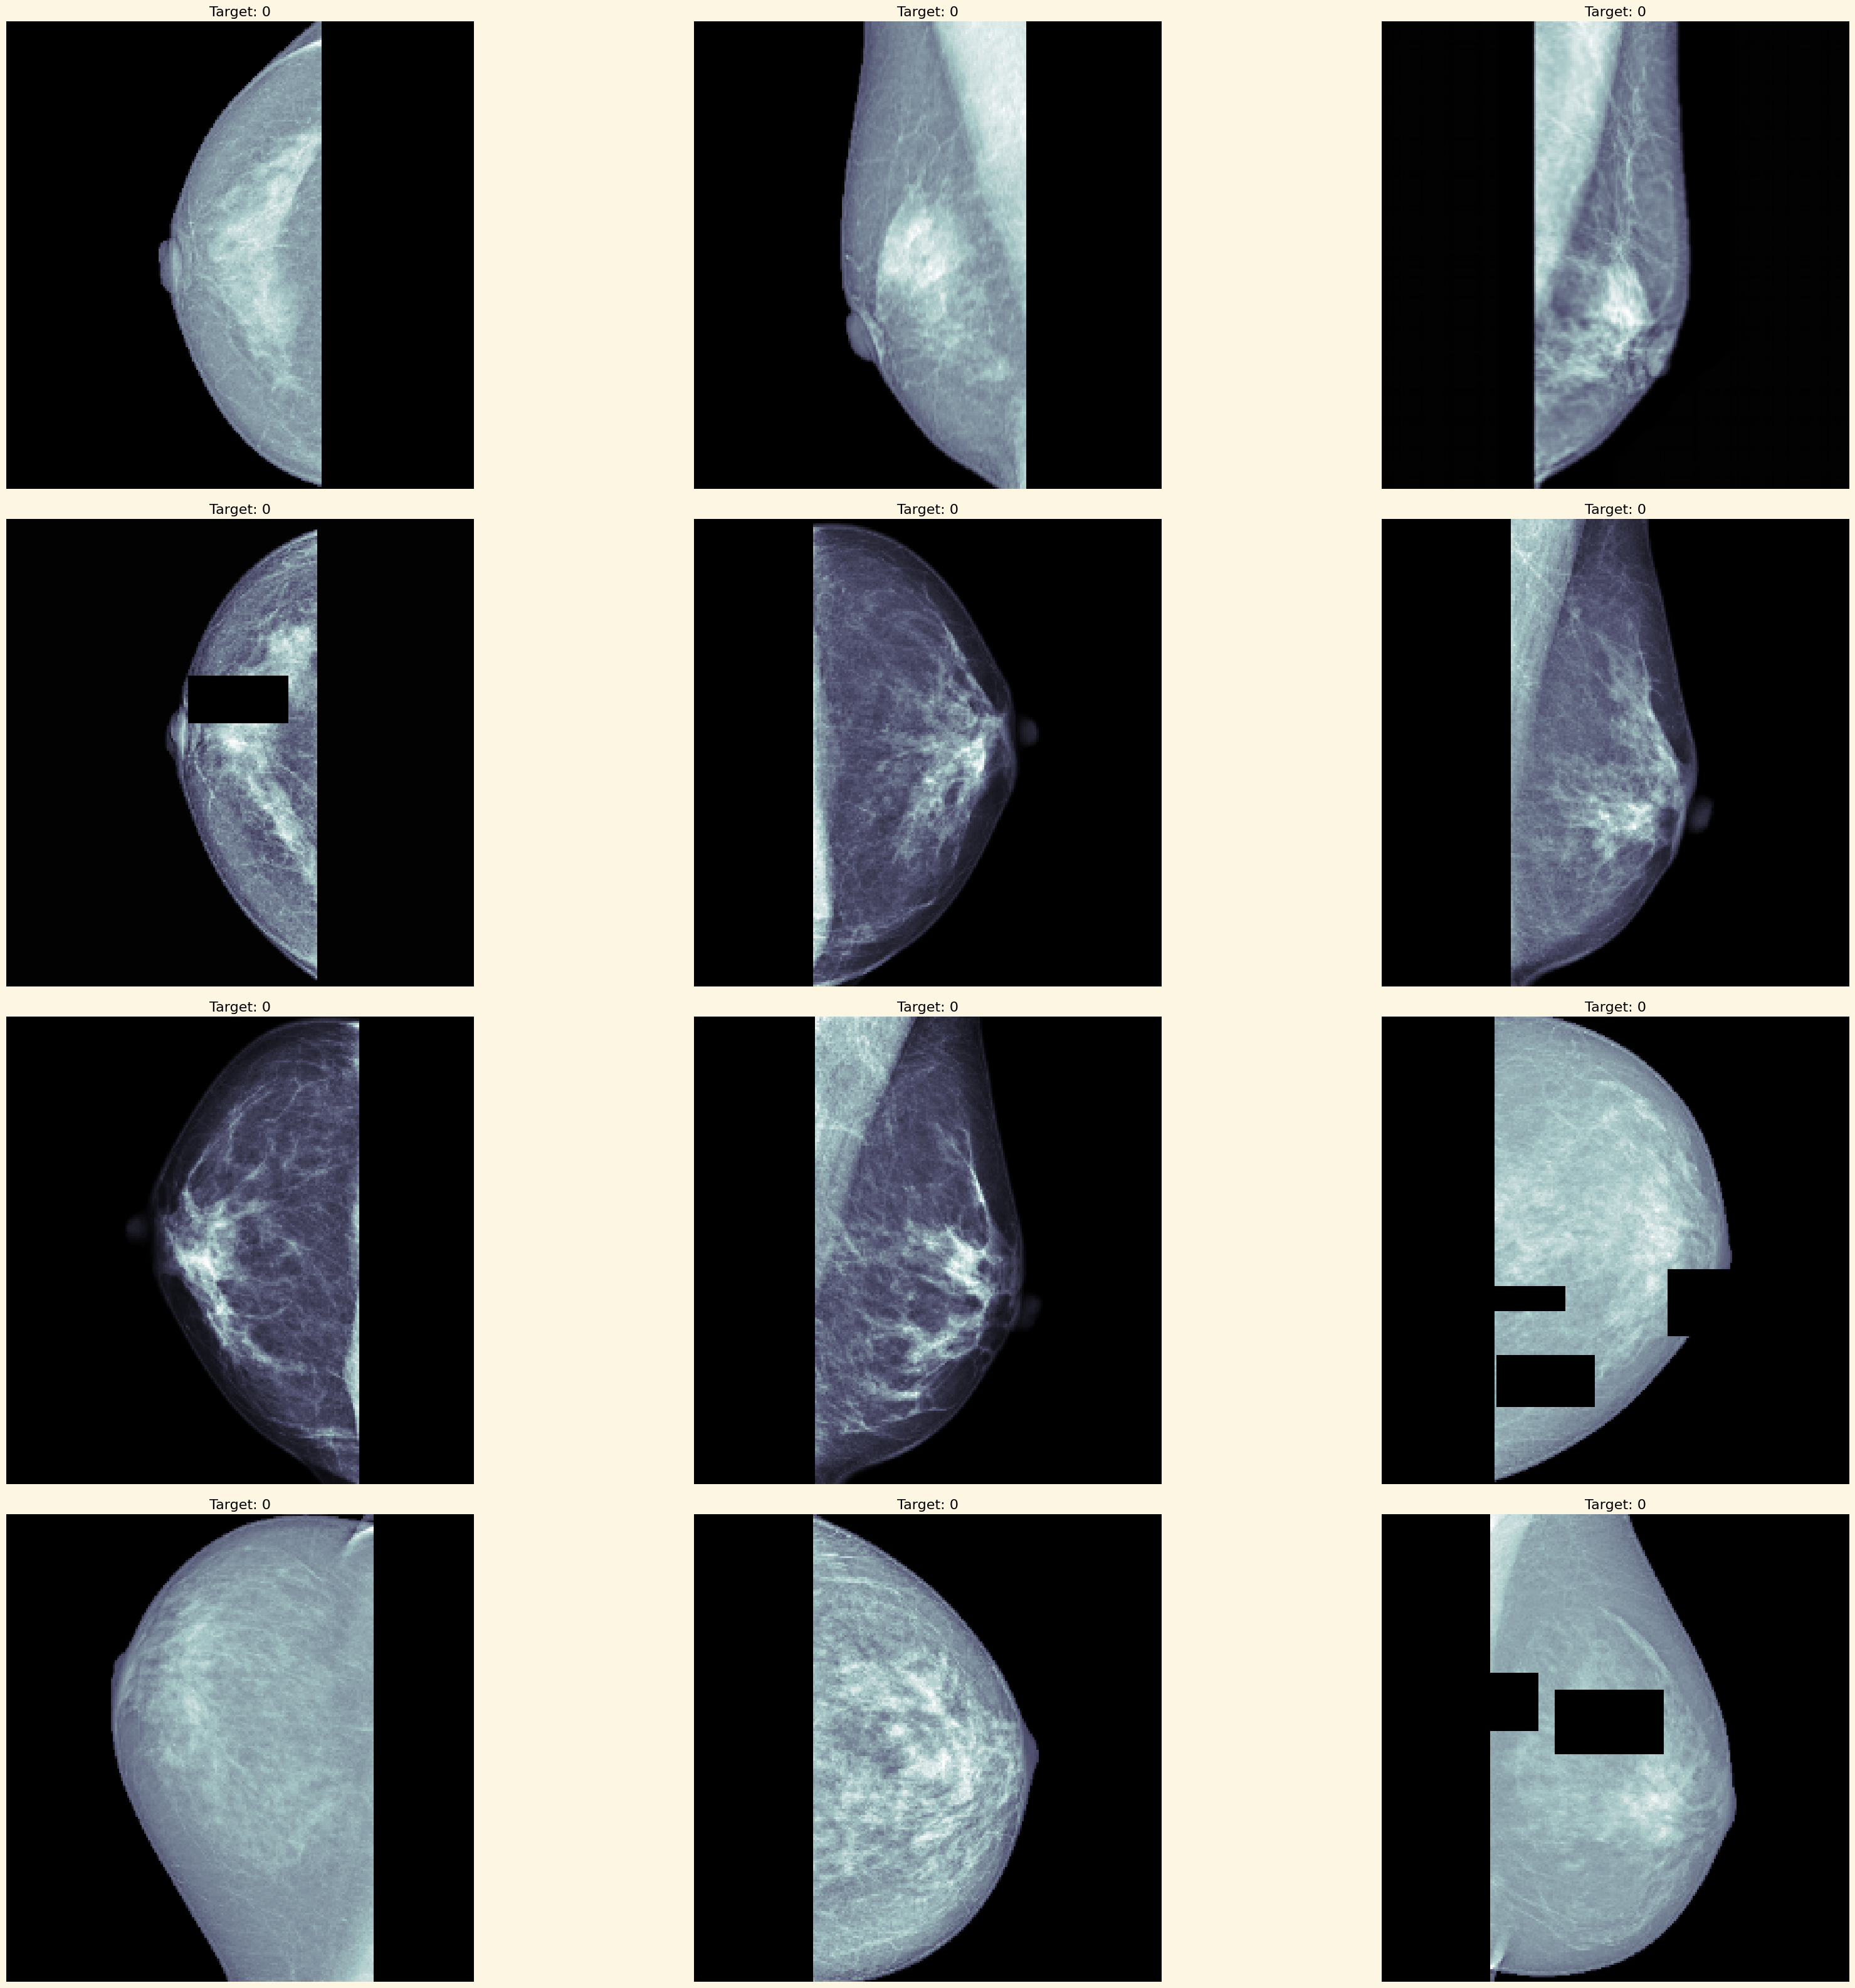

In [11]:
# == Sanity Check ==
train_data = train_df.reset_index(drop=True).head(12)
dataset = RSNADataset(
    dataFrame = train_data, 
    isTrain = True, 
    transforms=transforms
)
dataLoader = DataLoader(dataset, batch_size=64, shuffle=False, pin_memory=True)

for i, data in enumerate(dataLoader):
    image, meta, targets = data_to_device(data)
    print(f"Batch: {i} \n Image: {image.shape} \n Meta: {meta} \n Targets: {targets}")
    print("="*50)
    
    show_stacked_images(image, targets)

In [ ]:
class EffNetV2Network(nn.Module):
    
    def __init__(self, outputSize, no_columns):
        super().__init__()
        self.no_columns, self.outputSize = no_columns, outputSize
        
        # Load EfficientNetV2 (using correct model name)
    
        self.features = torchvision.models.efficientnet_v2_s(weights='IMAGENET1K_V1')
        self.features = nn.Sequential(*list(self.features.children())[:-1])
        
        self.csv = nn.Sequential(
            nn.Linear(self.no_columns, 250), 
            nn.BatchNorm1d(250),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            
            nn.Linear(250, 250),
            nn.BatchNorm1d(250),
            nn.ReLU(),
            nn.Dropout(p=0.2),
        )
        
        self.classification = nn.Sequential(nn.Linear(1280 + 250, self.outputSize),
                                            nn.Dropout(p=0.2))  # 1280 comes from EfficientNetV2-B0 output dimension
        
    def forward(self, image, meta, prints=False):
        if prints: 
            print(f"Input Image Shape: {image.shape} \n Input Metadata Shape: {meta.shape}")
        
        # == Image CNN == (EfficientNetV2 Feature Extraction)
        image = self.features(image) 
        image = F.avg_pool2d(image, image.size()[2:]).reshape(-1, 1280)  # 1280 is the output feature size for EfficientNetV2-B0
        if prints: 
            print(f'Features image shape: {image.shape}')
        
        # == CSV FNN == (Tabular data processing)
        meta = self.csv(meta)
        if prints: 
            print(f'Metadata shape: {meta.shape}')
        
        # Concatenate image features with metadata features
        image_meta_data = torch.cat((image, meta), dim=1)
        if prints: 
            print(f'Concatenated data: {image_meta_data.shape}')
       
        # == Final Classification ==
        out = self.classification(image_meta_data)
        if prints: 
            print(f'Out shape: {out.shape}')
        
        return out

In [ ]:
# == Sanity Check ==
model_example_2 = EffNetV2Network(outputSize=output_size,
                                no_columns=no_columns).to(DEVICE)

out = model_example_2(image, meta, prints=True)
criterion_example = nn.BCEWithLogitsLoss()
loss = criterion_example(out, targets.unsqueeze(1).float())

print("="*50)
print(f"Loss = {loss.item()}")

In [12]:
class ResNet50Network(nn.Module):
    
    def __init__(self, outSize, no_columns):
        super().__init__()
        self.no_columns, self.outSize = no_columns, outSize
        
        backbone = resnet50(weights=ResNet50_Weights.DEFAULT)
        
        # output before modifications: [B, 2048, 7, 7] for a 224x224 input
        # Remove the final classification layer to extract features (2048-dim)
        modules = list(backbone.children())[:-2]
        modules.append(nn.AdaptiveAvgPool2d(output_size=(1, 1)))
        self.features = nn.Sequential(*modules)     # output after AvgPool: [B, 2048, 1, 1]
        
        # == metadata ==
        self.csv = nn.Sequential(
            nn.Linear(self.no_columns, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(),
            nn.Dropout(p=0.2)
        )
        
        # Classification
        self.classification = nn.Linear(2048 + 500, self.outSize)
    
    def forward(self, image, meta, prints=False):
        if prints: 
            print(f"Input Image Shape: {image.shape} \n Input Metadata Shape: {meta.shape}")
        
        # == Image CNN ==
        image = self.features(image)
        image = image.view(image.size(0), -1)   # Flatten → [B, 2048]
        if prints: print(f'Features image shape: {image.shape}')
        
        # == CSV FNN ==
        meta = self.csv(meta)
        if prints: print(f'Metadata shape: {meta.shape}')
        
        # Concatenate layers from image with layers from csv_data
        image_meta_data = torch.cat((image, meta), dim=1)
        if prints: print(f'Concatenated data: {image_meta_data.shape}')
        
        # == CLASSIF ==
        out = self.classification(image_meta_data)
        if prints: print(f'Out shape: {out.shape}')
        
        return out

In [13]:
# == Sanity Check =#
model_example = ResNet50Network(
    outSize=output_size,
    no_columns=no_columns
).to(DEVICE)

out = model_example(image, meta, prints=True)

criterion_example = nn.BCEWithLogitsLoss()
loss = criterion_example(out, targets.unsqueeze(1).float())

print("="*50)
print(f"Loss = {loss.item()}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 229MB/s]


Input Image Shape: torch.Size([12, 3, 224, 224]) 
 Input Metadata Shape: torch.Size([12, 4])
Features image shape: torch.Size([12, 2048])
Metadata shape: torch.Size([12, 500])
Concatenated data: torch.Size([12, 2548])
Out shape: torch.Size([12, 1])
Loss = 0.6163488030433655


In [ ]:
df_pos = train_df[train_df['cancer'] == 1]
df_neg = train_df[train_df['cancer'] == 0]

# Oversample positives to match negatives
df_pos_oversampled = df_pos.sample(n=len(df_neg), replace=True, random_state=42)

# Combine and shuffle
train_df_balanced = pd.concat([df_neg, df_pos_oversampled], ignore_index=True)
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print(train_df_balanced['cancer'].value_counts(normalize=True))

## Training

In [14]:
def add_in_file(text, f, trial):
    with open(f"logs_{VERSION}_trial_{trial}.txt", "a+") as f:
        print(text, file=f)

In [15]:
FOLDS = 2
EPOCHS = 40
MIN_THRESHOLD_EPOCHS = 5
PATIENCE = 3
WD = 1e-4
LR_PATIENCE = 5
LR_FACTOR = 0.6

In [ ]:
import torch
from torch.cuda.amp import autocast, GradScaler


def pfbeta_torch(labels, preds, beta=1.0, eps=1e-5):
    """Compute probabilistic F-beta (pF1) score."""
    preds = preds.clamp(0, 1)
    labels = labels.float()

    y_true_count = labels.sum()
    ctp = preds[labels == 1].sum()  # true positives weighted by predicted probs
    cfp = preds[labels == 0].sum()  # false positives weighted by predicted probs

    beta_squared = beta ** 2
    c_precision = ctp / (ctp + cfp + eps)
    c_recall = ctp / (y_true_count + eps)

    if c_precision > 0 and c_recall > 0:
        return (1 + beta_squared) * (c_precision * c_recall) / (beta_squared * c_precision + c_recall + eps)
    else:
        return torch.tensor(0.0, device=preds.device)


In [ ]:
def pfbeta_best_threshold(labels, probs, beta=1.0, step=0.05):
    thresholds = torch.arange(0.0, 1.0, step, device=probs.device)
    best_score = torch.tensor(0.0, device=probs.device)
    
    for thr in thresholds:
        bin_preds = (probs > thr).float()
        score = pfbeta_torch(labels, bin_preds, beta=beta)
        if score > best_score:
            best_score = score
    return best_score

In [ ]:
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

set_seed(42)

gss = GroupShuffleSplit(n_splits=1, test_size=0.05, random_state=42)
holdout_idx, cv_idx = next(
    gss.split(
        X=train_df,
        y=train_df['cancer'],
        groups=train_df['patient_id']
    )
)

holdout_df = train_df.iloc[holdout_idx].reset_index(drop=True)
remaining_df = train_df.iloc[cv_idx].reset_index(drop=True)

holdout_ds = RSNADataset(holdout_df, isTrain=False, transforms=transforms)
holdout_loader = DataLoader(
    holdout_ds, batch_size=64, shuffle=False, pin_memory=True
)
# =======================================
# 1. Define Ensembling Function (Majority Voting / Soft Voting)
# - Purpose: 
#       + Designed to work with K-Fold Cross-Validation.
#       + After N folds, we have N best, independent models, working as a 'judge'
#       + These N judges output N independent predictions for each 'unseen' data.
#       + For ex: Model1: 0.98 - Model2: 0.99 - Model3: 0.975
#       + Finally, calculate the final average probability (soft voting)
# =======================================

def ensemble_predict(models, loader, voting_type='soft'):
    for m in models: m.eval().to(DEVICE)
    all_outputs = []
    with torch.no_grad():
        for m in models:
            outputs = []
            for batch in loader:
                img, meta, *_ = data_to_device(batch)
                with torch.cuda.amp.autocast():
                    logits = m(img, meta)
                output = torch.sigmoid(logits).detach()
                outputs.append(output)

                print(' --------------------------') # Loading on Kaggle
            all_outputs.append(torch.cat(outputs, dim=0).cpu())
    print('8888888888888888888')        
    all_outputs = torch.stack(all_outputs)
    print('9999999999999999999')
    if voting_type=='soft':
        # either average logits or average sigmoid
        all_probs = [torch.sigmoid(o) for o in all_outputs]
        avg_probs = torch.stack(all_probs).mean(dim=0)
        return avg_probs

## EfficientNet

In [ ]:
# =======================================
# 2. Modify `train_folds` to save top 3 models
# - Purpose:
#
#   + saveBestModel():
#       > stores N best models' weights for later uses.
#       > outputs a list of names of those N models (topModels).
#
#   + trainFunction():
#       > uses defined model to train. U can just replace model for diff results.
#       > return training_accuracy and training_loss.
#
#   + validFunction():
#       > for medical imaging, this function uses both ROC and F1 score
#       > to decide the best model.
#       > logs out result metrics, and returns best_overall_score.
#
#   + after validFunction()...:
#       > defines K-folds.
#       > uses all functions to train and some tricks for better scores.
#       > clear cache and cleaning process.
#
# =======================================

def train_folds(train_original, lr, batch_size, trial, epochs=3):
    
    topModelsPath = []

    def saveBestModel(foldNum, epochNum, valid_acc, best_f1, best_roc, best_overall_score):
        model_name = f"{VERSION}_Fold{foldNum}_Epoch{epochNum}_F1{best_f1:.3f}_ROC{best_roc:.3f}_SCORE{best_overall_score:.3f}.pth"
        torch.save(current_model.state_dict(), model_name)
        
        topModelsPath.append((model_name, best_overall_score))
        topModelsPath.sort(key=lambda x: x[1], reverse=True)
        
        if len(topModelsPath) > 3:
            removedModel = topModelsPath.pop()
            os.remove(removedModel[0])
            print(f"Deleted worst model: {removedModel[0]}")

    def create_dataloader(dataset,batch_size, shuffle=False, sampler=None):
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle if sampler is None else False, sampler=sampler, pin_memory=True)

    def trainFunction(epoch):
        current_model.train()
        total_loss, correct = 0.0, 0.0
        progBar = tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]", leave=False)
        scaler = GradScaler()
        for data in progBar:
            image, meta, targets = data_to_device(data)
            
            optimizer.zero_grad()
            with autocast():
                out = current_model(image, meta)
                loss = criterion(out, targets.unsqueeze(1).float())

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            total_loss += loss.item()
            train_preds = torch.round(torch.sigmoid(out))
            
            correct += (train_preds.cpu() == targets.cpu().unsqueeze(1)).sum().item()
            wandb.log({'train_loss': total_loss})
            progBar.set_description(f'loss: {total_loss:.2f}')

        train_acc = correct / len(train_index)
        
        wandb.log({"train_acc": train_acc})
        return train_acc, total_loss
    
    def validFunction(epoch, train_acc, total_loss):
        nonlocal best_roc, best_f1, best_overall_score, patience_f
        current_model.eval()
        
        # Pre-allocate output buffer
        preds_tensor = torch.zeros(len(valid_data), 1, device=DEVICE, dtype=torch.float32)
        offset = 0
        
        progBar = tqdm(valid_loader, desc=f"Epoch {epoch+1} [Valid]", leave=False)
        with torch.no_grad():
            for data in progBar:
                image, meta = data_to_device(data)
                out = current_model(image, meta)
                
                probs = torch.sigmoid(out).cpu()
                bs = probs.size(0)
                preds_tensor[offset: offset + bs] = probs
                offset += bs
                
                
        labels = valid_data['cancer'].values.astype(np.float32)
        probs = preds_tensor.cpu().numpy().reshape(-1)

        probs_torch = torch.tensor(probs, dtype=torch.float32, device=DEVICE)
        labels_torch = torch.tensor(labels, dtype=torch.float32, device=DEVICE)

        pf1 = pfbeta_torch(labels_torch, probs_torch).item()
        pf1_thr = pfbeta_best_threshold(labels_torch, probs_torch).item()
        
        fpr, tpr, thresholds = roc_curve(labels, probs, pos_label=1)
        roc = auc(fpr, tpr)
        


        wandb.log({"valid_roc": roc})
        wandb.log({"valid_F1Score":pf1})
        
        duration = str(time.time() - start_time)[:7]
        log = f'{duration} | Epoch: {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Acc_tr: {train_acc:.3f} | ROC: {roc:.3f} | F1: {pf1:.3f}'
        print(log)
        add_in_file(log, f, trial=trial)

        # scheduler.step(aupr) 
        scheduler.step(roc)

        if best_roc == 0 and best_f1 == 0:
            best_roc = roc
            best_f1 = pf1
            
       
        current_score = 0.5 * roc + 0.5 * pf1
        if best_overall_score is None or current_score > best_overall_score:
            best_overall_score = current_score
            best_roc = roc
            best_f1 = pf1
            
            saveBestModel(
                foldNum=i+1, epochNum=epoch+1, valid_acc=acc, 
                best_f1=best_f1, best_roc=best_roc, best_overall_score=best_overall_score
            )
            print(f"Saved new best model at Epoch {epoch+1}")
            return best_overall_score, PATIENCE
        else:
            return best_overall_score, patience_f - 1
    
    with open(f"logs_{VERSION}.txt", "w+") as f:
        print(f"Training with learning rate: {lr} and batch size: {batch_size}")
        f.write(f"Training with learning rate: {lr} and batch size: {batch_size}\n")
    
    train_original = train_original.sample(frac=1, random_state=42).reset_index(drop=True)

    group_fold = GroupKFold(n_splits=FOLDS)
    k_folds = group_fold.split(X=np.zeros(len(train_original)), y=train_original['cancer'], groups=train_original['patient_id'].tolist())
    
    for i, (train_index, valid_index) in enumerate(k_folds):
        print(f"-------- Fold: {i+1} --------")
        add_in_file(f"-------- Fold: {i+1} --------", f, trial=trial)
        
        RUN_CONFIG = CONFIG.copy()
        params = dict(model=MODEL, version=VERSION, fold=i, epochs=epochs, batch=batch_size, lr=lr, weight_decay=WD)
        RUN_CONFIG.update(params)
        wandb.init(project=WANDB_PROJ_NAME, config=RUN_CONFIG)
        
        best_roc = 0
        best_f1 = 0
        best_overall_score = None
        patience_f = PATIENCE
        current_model = EffNetV2Network(outputSize=output_size, no_columns=no_columns).to(DEVICE)

        
        wandb.watch(current_model, log_freq=100)
        
        train_data = train_original.iloc[train_index].reset_index(drop=True)
        valid_data = train_original.iloc[valid_index].reset_index(drop=True)
        
        neg, pos = train_data['cancer'].value_counts()
        pos_weight = torch.tensor([neg / pos], dtype=torch.float).to(DEVICE)

        optimizer = torch.optim.AdamW(current_model.parameters(), lr=lr, weight_decay=WD)
        scheduler = ReduceLROnPlateau(optimizer=optimizer, mode="max", patience=LR_PATIENCE, factor=LR_FACTOR)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
        train = RSNADataset(train_data, isTrain=True, transforms=transforms)
        valid = RSNADataset(valid_data, isTrain=False, transforms=transforms)

        class_counts = train_df['cancer'].value_counts().to_dict()  # e.g., {0: 53548, 1: 1158}
        class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
        sample_weights = train_data['cancer'].map(lambda x: class_weights[x])
        
        sampler = torch.utils.data.WeightedRandomSampler(
            weights=sample_weights.values, 
            num_samples=len(sample_weights), 
            replacement=True
        )
        train_loader = create_dataloader(train,batch_size=batch_size, shuffle=True, sampler=sampler)
        valid_loader = create_dataloader(valid,batch_size=batch_size, shuffle=False)
        
        for epoch in range(epochs):
            start_time = time.time()
            train_acc, total_loss = trainFunction(epoch)
            best_overall_score, patience_f = validFunction(epoch, train_acc, total_loss)
            if epoch + 1 > MIN_THRESHOLD_EPOCHS and patience_f == 0:
                msg = f"Early stopping | Best ROC: {best_roc:.4f}"
                print(msg)
                add_in_file(msg, f, trial=trial)
                break
        
        del train_loader, valid_loader, train, valid
                
        gc.collect()
        torch.cuda.empty_cache()
        # wandb.finish()

    return topModelsPath

In [ ]:
###### # =======================================
# 3. Utilize all and train
# - Purpose:
#   + hyperparameter optimization using Optuna with learning_rate and batch_size.
#   + model can be changed freely, RestNet or EffNet or Transformer.
#   + reuse the earlier holdout set for final evaluation.
# =======================================

VERSION = 'v6'
MODEL = 'EffNetV2'

top_models = []
# top_models_path = None    

# Optimization using Optuna
def objective(trial):
    trial_number = trial.number
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32,64])


    
    # Train the model and get N top models from N folds
    top_models_path = train_folds(
        train_original=train_df, 
        lr=lr, batch_size=batch_size, trial=trial_number, epochs=EPOCHS
    )
    
    top_models = [path for (path,roc) in top_models_path]
    ''' 
        Below we will calculate the final (average) score from 
        N best models of N_folds by using freshly new data.
        The data can be prepared by either:
        
        1. You have new data, or
        2. using the 5% data - holdout dataset that I have saved earlier
    '''
    
    BASE_DIR = '/kaggle/working/'
    loaded_models = []
    for model_path, _ in top_models_path:
        model_instance = EffNetV2Network(outputSize=output_size, no_columns=no_columns)
        dict_path = os.path.join(BASE_DIR, model_path)
        
        model_instance.load_state_dict(torch.load(dict_path, map_location=DEVICE))
        model_instance.to(DEVICE)
        loaded_models.append(model_instance)
        

    holdout_logits = ensemble_predict(
        loaded_models, 
        holdout_loader, 
        voting_type='soft'
    )
    roc = roc_auc_score(holdout_df['cancer'], holdout_logits.numpy())
    print("Hold-out ROC AUC:", roc)

    # == Clean up ==
    for m in loaded_models:
        del m
    torch.cuda.empty_cache()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)
print("Best hyperparameters: ", study.best_params)

best_trial = study.best_trial.number
with open(f"logs_{VERSION}_trial_{best_trial}.txt", "r") as f:
    contents = f.read()
    print(contents)


## ResNet

In [ ]:
def train_folds(train_original, lr, batch_size, trial, epochs=3):
    
    topModelsPath = []

    def saveBestModel(foldNum, epochNum, valid_acc, best_f1, best_roc, best_overall_score):
        model_name = f"{VERSION}_Fold{foldNum}_Epoch{epochNum}_F1{best_f1:.3f}_ROC{best_roc:.3f}_SCORE{best_overall_score:.3f}.pth"
        torch.save(current_model.state_dict(), model_name)
        
        topModelsPath.append((model_name, best_overall_score))
        topModelsPath.sort(key=lambda x: x[1], reverse=True)
        
        if len(topModelsPath) > 3:
            removedModel = topModelsPath.pop()
            os.remove(removedModel[0])
            print(f"Deleted worst model: {removedModel[0]}")

    def create_dataloader(dataset,batch_size, shuffle=False, sampler=None):
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle if sampler is None else False, sampler=sampler, pin_memory=True)

    def trainFunction(epoch):
        current_model.train()
        total_loss, correct = 0.0, 0.0
        progBar = tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]", leave=False)
        scaler = GradScaler()
        for data in progBar:
            image, meta, targets = data_to_device(data)
            
            optimizer.zero_grad()
            with autocast():
                out = current_model(image, meta)
                loss = criterion(out, targets.unsqueeze(1).float())

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            total_loss += loss.item()
            train_preds = torch.round(torch.sigmoid(out))
            
            correct += (train_preds.cpu() == targets.cpu().unsqueeze(1)).sum().item()
            wandb.log({'train_loss': total_loss})
            progBar.set_description(f'loss: {total_loss:.2f}')

        train_acc = correct / len(train_index)
        
        wandb.log({"train_acc": train_acc})
        return train_acc, total_loss
    
    def validFunction(epoch, train_acc, total_loss):
        nonlocal best_roc, best_f1, best_overall_score, patience_f
        current_model.eval()
        
        # Pre-allocate output buffer
        preds_tensor = torch.zeros(len(valid_data), 1, device=DEVICE, dtype=torch.float32)
        offset = 0
        
        progBar = tqdm(valid_loader, desc=f"Epoch {epoch+1} [Valid]", leave=False)
        with torch.no_grad():
            for data in progBar:
                image, meta = data_to_device(data)
                out = current_model(image, meta)
                
                probs = torch.sigmoid(out).cpu()
                bs = probs.size(0)
                preds_tensor[offset: offset + bs] = probs
                offset += bs
                
                
        labels = valid_data['cancer'].values.astype(np.float32)
        probs = preds_tensor.cpu().numpy().reshape(-1)

        probs_torch = torch.tensor(probs, dtype=torch.float32, device=DEVICE)
        labels_torch = torch.tensor(labels, dtype=torch.float32, device=DEVICE)

        pf1 = pfbeta_torch(labels_torch, probs_torch).item()
        pf1_thr = pfbeta_best_threshold(labels_torch, probs_torch).item()
        
        fpr, tpr, thresholds = roc_curve(labels, probs, pos_label=1)
        roc = auc(fpr, tpr)
        

        wandb.log({"valid_roc": roc})
        wandb.log({"valid_F1Score": pf1})
        
        duration = str(time.time() - start_time)[:7]
        log = f'{duration} | Epoch: {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Acc_tr: {train_acc:.3f} | ROC: {roc:.3f} | F1: {pf1:.3f}'
        print(log)
        add_in_file(log, f, trial=trial)

        # scheduler.step(aupr) 
        scheduler.step(roc)

        if best_roc == 0 and best_f1 == 0:
            best_roc = roc
            best_f1 = pf1
            
       
        current_score = 0.5 * roc + 0.5 * pf1
        if best_overall_score is None or current_score > best_overall_score:
            best_overall_score = current_score
            best_roc = roc
            best_f1 = pf1
            
            saveBestModel(
                foldNum=i+1, epochNum=epoch+1, valid_acc=acc, 
                best_f1=best_f1, best_roc=best_roc, best_overall_score=best_overall_score
            )
            print(f"Saved new best model at Epoch {epoch+1}")
            return best_overall_score, PATIENCE
        else:
            return best_overall_score, patience_f - 1
    
    with open(f"logs_{VERSION}.txt", "w+") as f:
        print(f"Training with learning rate: {lr} and batch size: {batch_size}")
        f.write(f"Training with learning rate: {lr} and batch size: {batch_size}\n")
    
    train_original = train_original.sample(frac=1, random_state=42).reset_index(drop=True)

    group_fold = GroupKFold(n_splits=FOLDS)
    k_folds = group_fold.split(X=np.zeros(len(train_original)), y=train_original['cancer'], groups=train_original['patient_id'].tolist())
    
    for i, (train_index, valid_index) in enumerate(k_folds):
        print(f"-------- Fold: {i+1} --------")
        add_in_file(f"-------- Fold: {i+1} --------", f, trial=trial)
        
        RUN_CONFIG = CONFIG.copy()
        params = dict(model=MODEL, version=VERSION, fold=i, epochs=epochs, batch=batch_size, lr=lr, weight_decay=WD)
        RUN_CONFIG.update(params)
        wandb.init(project=WANDB_PROJ_NAME, config=RUN_CONFIG)
        
        best_roc = 0
        best_f1 = 0
        best_overall_score = None
        patience_f = PATIENCE
        current_model = ResNet50Network(outSize=output_size, no_columns=no_columns).to(DEVICE)

        
        wandb.watch(current_model, log_freq=100)
        
        train_data = train_original.iloc[train_index].reset_index(drop=True)
        valid_data = train_original.iloc[valid_index].reset_index(drop=True)
        
        neg, pos = train_data['cancer'].value_counts()
        pos_weight = torch.tensor([neg / pos], dtype=torch.float).to(DEVICE)

        optimizer = torch.optim.AdamW(current_model.parameters(), lr=lr, weight_decay=WD)
        scheduler = ReduceLROnPlateau(optimizer=optimizer, mode="max", patience=LR_PATIENCE, factor=LR_FACTOR)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
        train = RSNADataset(train_data, isTrain=True, transforms=transforms)
        valid = RSNADataset(valid_data, isTrain=False, transforms=transforms)

        class_counts = train_df['cancer'].value_counts().to_dict()  # e.g., {0: 53548, 1: 1158}
        class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
        sample_weights = train_data['cancer'].map(lambda x: class_weights[x])
        
        sampler = torch.utils.data.WeightedRandomSampler(
            weights=sample_weights.values, 
            num_samples=len(sample_weights), 
            replacement=True
        )
        train_loader = create_dataloader(train,batch_size=batch_size, shuffle=True, sampler=sampler)
        valid_loader = create_dataloader(valid,batch_size=batch_size, shuffle=False)
        
        for epoch in range(epochs):
            start_time = time.time()
            train_acc, total_loss = trainFunction(epoch)
            best_overall_score, patience_f = validFunction(epoch, train_acc, total_loss)
            if epoch + 1 > MIN_THRESHOLD_EPOCHS and patience_f == 0:
                msg = f"Early stopping | Best ROC: {best_roc:.4f}"
                print(msg)
                add_in_file(msg, f, trial=trial)
                break
        
        del train_loader, valid_loader, train, valid
                
        gc.collect()
        torch.cuda.empty_cache()
        wandb.finish()

    return topModelsPath

In [ ]:
VERSION = 'v1'
MODEL = 'resnet50'

top_models = []
# top_models_path = None    

# Optimization using Optuna
def objective(trial):
    trial_number = trial.number
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32,64])

    
    # Train the model and get N top models from N folds
    top_models_path = train_folds( 
        train_original=train_df, 
        lr=lr, batch_size=batch_size, trial=trial_number, epochs=EPOCHS
    )
    
    top_models = [path for (path,roc) in top_models_path]
    ''' 
        Below we will calculate the final (average) score from 
        N best models of N_folds by using freshly new data.
        The data can be prepared by either:
        
        1. You have new data, or
        2. using the 5% data - holdout dataset that I have saved earlier
    '''
    
    BASE_DIR = '/kaggle/working/'
    loaded_models = []
    
    for model_path in top_models:
        model_instance = ResNet50Network(outSize=output_size, no_columns=no_columns)
        dict_path = os.path.join(BASE_DIR, model_path)
        
        model_instance.load_state_dict(torch.load(dict_path, map_location=DEVICE))
        model_instance.to(DEVICE)
        loaded_models.append(model_instance)
        
    
    holdout_logits = ensemble_predict(
        loaded_models, 
        holdout_loader, 
        voting_type='soft'
    )
    print('---------------------------------------------------------------------------------------')
    roc = roc_auc_score(holdout_df['cancer'], holdout_logits.numpy())
    print("Hold-out ROC AUC:", roc)

    # == Clean up ==
    for m in loaded_models:
        del m
    torch.cuda.empty_cache()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)
print("Best hyperparameters: ", study.best_params)

best_trial = study.best_trial.number
with open(f"logs_{VERSION}_trial_{best_trial}.txt", "r") as f:
    contents = f.read()
    print(contents)


In [ ]:
import torch

total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
reserved = torch.cuda.memory_reserved(0) / (1024**3)
allocated = torch.cuda.memory_allocated(0) / (1024**3)
free = reserved - allocated

print(f"Total Memory:     {total:.2f} GiB")
print(f"Reserved Memory:  {reserved:.2f} GiB")
print(f"Allocated Memory: {allocated:.2f} GiB")
print(f"Free (available): {free:.2f} GiB")

In [ ]:
os._exit(00)